In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Chain code implementation (4 direction)

Source image


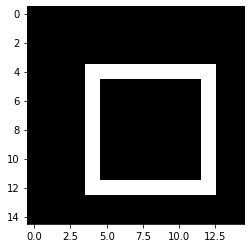

Source image


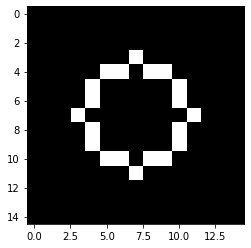

In [96]:
images = []

# Test image : Square
image = np.zeros((15, 15), np.uint8)
image = cv2.rectangle(image, (4,4), (12,12), (255, 255, 255), -1)
image = cv2.rectangle(image, (5,5), (11,11), (0, 0, 0), -1)
image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)[1]
print('Source image')
plt.imshow(image, cmap='gray')
plt.show()
images.append(image)

# Test image : Circle
image = np.zeros((15, 15), np.uint8)
image = cv2.circle(image, (7,7), 4, (255, 255, 255), -1)
image = cv2.circle(image, (7,7), 3, (0, 0, 0), -1)
image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)[1]
print('Source image')
plt.imshow(image, cmap='gray')
plt.show()
images.append(image)

(15, 15)
Starting point: [4, 4]
Source image


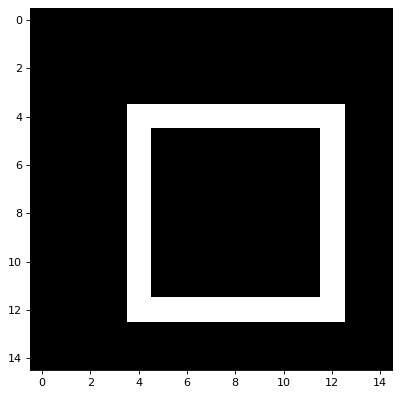

CURR NOW :  [5, 4]
CURR NOW :  [6, 4]
CURR NOW :  [7, 4]
CURR NOW :  [8, 4]
CURR NOW :  [9, 4]
CURR NOW :  [10, 4]
CURR NOW :  [11, 4]
CURR NOW :  [12, 4]
CURR NOW :  [12, 5]
CURR NOW :  [12, 6]
CURR NOW :  [12, 7]
CURR NOW :  [12, 8]
CURR NOW :  [12, 9]
CURR NOW :  [12, 10]
CURR NOW :  [12, 11]
CURR NOW :  [12, 12]
CURR NOW :  [11, 12]
CURR NOW :  [10, 12]
CURR NOW :  [9, 12]
CURR NOW :  [8, 12]
CURR NOW :  [7, 12]
CURR NOW :  [6, 12]
CURR NOW :  [5, 12]
CURR NOW :  [4, 12]
CURR NOW :  [4, 11]
CURR NOW :  [4, 10]
CURR NOW :  [4, 9]
CURR NOW :  [4, 8]
CURR NOW :  [4, 7]
CURR NOW :  [4, 6]
CURR NOW :  [4, 5]
CURR NOW :  [4, 4]
CURR NOW :  [4, 4]
00000000666666664444444422222222
None
(15, 15)
Starting point: [7, 3]
Source image


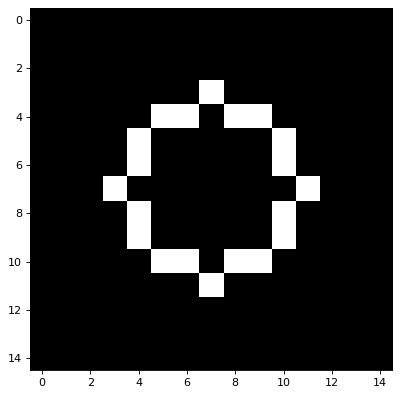

CURR NOW :  [8, 4]
CURR NOW :  [9, 4]
CURR NOW :  [10, 5]
CURR NOW :  [10, 6]
CURR NOW :  [11, 7]
CURR NOW :  [10, 8]
CURR NOW :  [10, 9]
CURR NOW :  [9, 10]
CURR NOW :  [8, 10]
CURR NOW :  [7, 11]
CURR NOW :  [6, 10]
CURR NOW :  [5, 10]
CURR NOW :  [4, 9]
CURR NOW :  [4, 8]
CURR NOW :  [3, 7]
CURR NOW :  [4, 6]
CURR NOW :  [4, 5]
CURR NOW :  [5, 4]
CURR NOW :  [6, 4]
CURR NOW :  [7, 3]
CURR NOW :  [7, 3]
70767565453432312101
None


In [97]:
for image in images:
# Get starting position (top leftmost part of image)

  print(image.shape)
  def get_start_point(image):

    start_point = [0, 0]
    for j in range(image.shape[0]):
      for i in range(image.shape[1]):
        #print(i, ' ', j)
        if (image[i][j] == 255):
          start_point[0] = i
          start_point[1] = j
          return start_point

  print('Starting point:', get_start_point(image))
  start_point = get_start_point(image)

  def is_in_range(image, point):
    if point[0] >= 0 and point[0] < image.shape[0] and point[1] >= 0 and point[1] < image.shape[1]:
      return True
    return False

  def chain_code_8n(image, start_point):
    s = ""
    visited = list()

    prev_point = [-1, -1]
    curr_point = start_point
  
    while curr_point in visited and prev_point[0] != curr_point[0] or prev_point[1] != curr_point[1]:
      prev_point = curr_point

      if (is_in_range(image, [prev_point[0]+1, prev_point[1]]) and image[curr_point[0]+1][curr_point[1]] == 255 and not [prev_point[0]+1, prev_point[1]] in visited):
        curr_point = [curr_point[0]+1, curr_point[1]]
        s += '0'
      
      elif (is_in_range(image,  [prev_point[0]+1, prev_point[1]+1]) and image[curr_point[0]+1][curr_point[1]+1] == 255 and not [prev_point[0]+1, prev_point[1]+1] in visited):
        curr_point = [curr_point[0]+1, curr_point[1]+1]
        s += '7'

      elif (is_in_range(image,  [prev_point[0], prev_point[1]+1]) and image[curr_point[0]][curr_point[1]+1] == 255 and not [prev_point[0], prev_point[1]+1] in visited):
        curr_point = [curr_point[0], curr_point[1]+1]
        s += '6'

      elif (is_in_range(image,  [prev_point[0]-1, prev_point[1]+1]) and image[curr_point[0]-1][curr_point[1]+1] == 255 and not [prev_point[0]-1, prev_point[1]+1] in visited):
        curr_point = [curr_point[0]-1, curr_point[1]+1]
        s += '5'

      elif (is_in_range(image,  [prev_point[0]-1, prev_point[1]]) and image[curr_point[0]-1][curr_point[1]] == 255 and not [prev_point[0]-1, prev_point[1]] in visited):
        curr_point = [curr_point[0]-1, curr_point[1]]
        s += '4'
      
      elif (is_in_range(image,  [prev_point[0]-1, prev_point[1]-1]) and image[curr_point[0]-1][curr_point[1]-1] == 255 and not [prev_point[0]-1, prev_point[1]-1] in visited):
        curr_point = [curr_point[0]-1, curr_point[1]-1]
        s += '3'

      elif (is_in_range(image,  [prev_point[0], prev_point[1]-1]) and image[curr_point[0]][curr_point[1]-1] == 255 and not [prev_point[0], prev_point[1]-1] in visited):
        curr_point = [curr_point[0], curr_point[1]-1]
        s += '2'

      elif (is_in_range(image,  [prev_point[0]+1, prev_point[1]-1]) and image[curr_point[0]+1][curr_point[1]-1] == 255 and not [prev_point[0]+1, prev_point[1]-1] in visited):
        curr_point = [curr_point[0]+1, curr_point[1]-1]
        s += '1'

      visited.append(curr_point)
  
      print('CURR NOW : ', curr_point)
      #print('PREV NOW : ', prev_point)
    print(s)
  print('Source image')
  plt.figure(figsize=(8, 6), dpi=80)
  plt.imshow(image, cmap='gray')
  plt.show()

  print(chain_code_8n(image, start_point))